In [13]:
from importlib import reload
import utils; reload(utils)
from utils import *

Using cuDNN version 5105 on context None
Preallocating 2867/4095 Mb (0.700000) on cuda0
Mapped name None to device cuda0: GeForce GTX 650 (0000:01:00.0)
Using Theano backend.


In [14]:
%matplotlib inline
import os, random
from shutil import copytree
# data_path =  '/Volumes/Backups/data/LUNA16/patches/50x50/'
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

In [15]:
theano.config.dnn.conv.precision = 'float32'
print(theano.config.dnn.conv.precision)

float32


In [16]:
#for i in range(5):
#    patches1 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches1/"))
#    patches0 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches0/"))
#    try:
#        copytree(data_path + 'patches1/' + patches1, '/Volumes/Backups/data/LUNA16/patches/sample2/patches1/' + patches1)
#    except FileExistsError:
#        continue
#    try:
#        copytree(data_path + 'patches0/' + patches0, '/Volumes/Backups/data/LUNA16/patches/sample2/patches0/' + patches0)
#    except FileExistsError:
#        continue

In [17]:
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
import pandas as pd
from vgg16bn import Vgg16BN

In [18]:
model = vgg_ft_bn(2)

/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [19]:
from vgg16bn import Vgg16BN
model = vgg_ft_bn(2)


/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [20]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [21]:
model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [22]:
from skimage import color

In [23]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

In [24]:
np_img = np.zeros((1,224,224))

In [25]:
np_img


array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

In [26]:
data_path # /Volumes/Backups/data/LUNA16/patches/224x224/patches1/

'/Volumes/Backups/data/LUNA16/patches/'

In [156]:
import glob2
from skimage import color
image_labels = []

input_path = data_path + "224x224/"
img_size = 224

# input_path = data_path + "100x100/"
# img_size = 100

ctr = 0
for filename in (os.listdir(input_path)):
    print(filename)
    for image in  glob2.glob(input_path + filename+'/*'):
        ctr += 1
img_array = np.zeros((ctr,3,img_size,img_size),dtype=np.float32)
# img_array = np.zeros((ctr,3,50,50),dtype=np.float32)


i=0
nKind = 0
#for filename in glob2.glob(data_path+'sample/*/*'):
for filename in (os.listdir(input_path)):
    print(filename)
    for image_name in  glob2.glob(input_path + filename+'/*'):
        print(image_name)
        if (filename == 'patches0'):
            image_labels.append(np.int16(0.0))
        else:
            image_labels.append(np.int16(1.0))
        img = color.gray2rgb(load_array(image_name)).astype(np.float32)
        img_array[i] = np.transpose(np.asarray(img,dtype=np.float32),(2,0,1))
        i += 1
        print(i)
        if i >= 1000 + nKind:
            nKind = 1000
            break



patches0
patches1
patches0
/Volumes/Backups/data/LUNA16/patches/224x224/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439465_224x224.bc
1
/Volumes/Backups/data/LUNA16/patches/224x224/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439553_224x224.bc
2
/Volumes/Backups/data/LUNA16/patches/224x224/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439796_224x224.bc
3
/Volumes/Backups/data/LUNA16/patches/224x224/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439951_224x224.bc
4
/Volumes/Backups/data/LUNA16/patches/224x224/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439994_224x224.bc
5
/Volumes/Backups/data/LUNA16/patches/224x224/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274651_224x224.bc
6
/Volumes/Backups/data/LUNA16/patches/224x224/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274670_224x224.bc
7


In [157]:
img_array = img_array[:2000]

In [158]:
img_array.shape

(2000, 3, 224, 224)

In [159]:
img_array[0,0]

array([[ 132.6   ,  130.9607,  132.0536, ...,  194.1643,  184.875 ,  174.8571],
       [ 129.8679,  132.9643,  139.8857, ...,  190.5214,  182.325 ,  173.7643],
       [ 123.3107,  129.5036,  145.8964, ...,  190.8857,  180.8679,  169.2107],
       ..., 
       [ 190.7036,  188.5179,  189.6107, ...,   10.3821,    5.1   ,    6.0107],
       [ 185.0571,  182.325 ,  183.4179, ...,    9.8357,    4.9179,    0.3643],
       [ 176.6786,  175.4036,  176.3143, ...,   10.9286,   10.2   ,    5.2821]], dtype=float32)

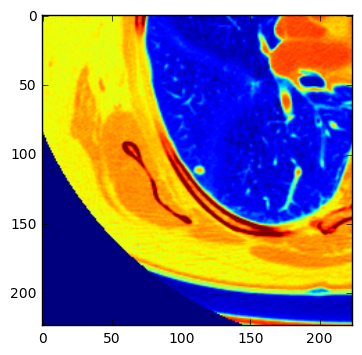

In [163]:
for img in img_array[1997:1998]:
    plt.figure
    plt.imshow(img[0], vmin=0, vmax=255)

In [164]:
img_array[0]

array([[[ 132.6   ,  130.9607,  132.0536, ...,  194.1643,  184.875 ,  174.8571],
        [ 129.8679,  132.9643,  139.8857, ...,  190.5214,  182.325 ,  173.7643],
        [ 123.3107,  129.5036,  145.8964, ...,  190.8857,  180.8679,  169.2107],
        ..., 
        [ 190.7036,  188.5179,  189.6107, ...,   10.3821,    5.1   ,    6.0107],
        [ 185.0571,  182.325 ,  183.4179, ...,    9.8357,    4.9179,    0.3643],
        [ 176.6786,  175.4036,  176.3143, ...,   10.9286,   10.2   ,    5.2821]],

       [[ 132.6   ,  130.9607,  132.0536, ...,  194.1643,  184.875 ,  174.8571],
        [ 129.8679,  132.9643,  139.8857, ...,  190.5214,  182.325 ,  173.7643],
        [ 123.3107,  129.5036,  145.8964, ...,  190.8857,  180.8679,  169.2107],
        ..., 
        [ 190.7036,  188.5179,  189.6107, ...,   10.3821,    5.1   ,    6.0107],
        [ 185.0571,  182.325 ,  183.4179, ...,    9.8357,    4.9179,    0.3643],
        [ 176.6786,  175.4036,  176.3143, ...,   10.9286,   10.2   ,    5.2821]

In [165]:
 img_array.shape

(2000, 3, 224, 224)

In [166]:
img.shape

(3, 224, 224)

In [167]:
type(img[0][0][0])

numpy.float32

In [168]:
type(img_array[0][0][0][0])

numpy.float32

In [169]:
len(image_labels)

2000

In [170]:
type(image_labels[19])

numpy.int16

In [171]:
ohe_image_labels = to_categorical(np.array(np.float32(image_labels))).astype(np.float32)

In [172]:
sum(ohe_image_labels) # [0,1], [healthy, sick]

array([ 1000.,  1000.], dtype=float32)

In [173]:
type(ohe_image_labels[0][0])

numpy.float32

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
trn_labels, val_labels = train_test_split(ohe_image_labels, test_size=0.2, random_state=42)

In [176]:
trn,val = train_test_split(img_array, test_size=0.2, random_state=42,)

In [177]:
trn.shape

(1600, 3, 224, 224)

In [178]:
type(val[0][0][1][0])

numpy.float32

In [179]:
batch_size = 4

In [180]:
type(val[1][0][1][0])

numpy.float32

In [181]:
# model.fit(trn, 
#           trn_labels, 
#           batch_size=batch_size, 
#           nb_epoch=1, 
#           validation_data=(val, val_labels),verbose = 1)


In [182]:
# model.save_weights(data_path+'results/ft1.h5')

In [183]:
conv_layers,fc_layers = split_at(model, Convolution2D)

In [184]:
conv_layers

In [185]:
conv_model = Sequential(conv_layers)

In [186]:
%time conv_trn_feat = conv_model.predict(trn)

CPU times: user 3min 13s, sys: 720 ms, total: 3min 14s
Wall time: 3min 14s


In [187]:
conv_trn_feat.shape

(1600, 512, 14, 14)

In [188]:
%time conv_val_feat = conv_model.predict(val)

CPU times: user 48.2 s, sys: 166 ms, total: 48.3 s
Wall time: 48.4 s


In [189]:
conv_val_feat.shape

(400, 512, 14, 14)

In [190]:
save_array(data_path+'results/conv_val_feat.dat', conv_val_feat)

In [191]:
type(conv_trn_feat[0][0][0][0])


numpy.float32

In [192]:
save_array(data_path+'results/conv_trn_feat.dat', conv_trn_feat)

## Model Training

In [193]:
conv_val_feat = load_array(data_path+'results/conv_val_feat.dat')

In [194]:
conv_val_feat.shape

(400, 512, 14, 14)

In [195]:
conv_trn_feat = load_array(data_path+'results/conv_trn_feat.dat')

In [196]:
conv_trn_feat.shape

(1600, 512, 14, 14)

In [259]:
nf=256; p=0.625

In [260]:
def get_fc_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dropout(p),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(2, activation='softmax'),
    ]


In [261]:
lrg_model = Sequential(get_fc_layers())

In [262]:
lrg_model.input_shape, lrg_model.output_shape

((None, 512, 14, 14), (None, 2))

In [263]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_20 (BatchNorm (None, 512, 14, 14)   2048        batchnormalization_input_6[0][0] 
____________________________________________________________________________________________________
flatten_8 (Flatten)              (None, 100352)        0           batchnormalization_20[0][0]      
____________________________________________________________________________________________________
dropout_20 (Dropout)             (None, 100352)        0           flatten_8[0][0]                  
____________________________________________________________________________________________________
dense_24 (Dense)                 (None, 256)           25690368    dropout_20[0][0]                 
___________________________________________________________________________________________

In [264]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [265]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=1, 
              validation_data=(conv_val_feat, val_labels))

Train on 1600 samples, validate on 400 samples
Epoch 1/1
1600/1600 [==============================] - 27s - loss: 1.1981 - acc: 0.5750 - val_loss: 0.8617 - val_acc: 0.6400

In [266]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 1600 samples, validate on 400 samples
Epoch 1/3
1600/1600 [==============================] - 27s - loss: 0.7412 - acc: 0.6913 - val_loss: 0.6960 - val_acc: 0.6975

In [267]:
lrg_model.optimizer.lr = 0.0001

In [268]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
          validation_data=(conv_val_feat, val_labels))


Train on 1600 samples, validate on 400 samples
Epoch 1/3
1600/1600 [==============================] - 27s - loss: 0.2435 - acc: 0.9006 - val_loss: 0.6324 - val_acc: 0.7275

In [269]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 1600 samples, validate on 400 samples
Epoch 1/3
1600/1600 [==============================] - 27s - loss: 0.2012 - acc: 0.9256 - val_loss: 0.6363 - val_acc: 0.7350

In [270]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=10, 
              validation_data=(conv_val_feat, val_labels))

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 27s - loss: 0.1543 - acc: 0.9431 - val_loss: 0.6476 - val_acc: 0.7350

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=10, 
              validation_data=(conv_val_feat, val_labels))

Train on 1600 samples, validate on 400 samples
Epoch 1/10
 360/1600 [=====>........................] - ETA: 20s - loss: 0.1153 - acc: 0.9556

In [ ]:
unresArr198 = load_array('/Volumes/Backups/data/unlabeled_patient_collapsed_images-198x3x224x224.bc')

In [ ]:
unlabeledPredictionvgg = lrg_model.predict(unresArr198, batch_size=8, verbose=1)

In [ ]:
#conv_feat = load_array(data_root + 'results/conv_feat.dat')
#conv_val_feat = load_array(data_root + 'results/conv_val_feat.dat')

In [165]:
theano.config.optimizer_verbose = False
print(theano.config.optimizer_verbose)

False


In [167]:
len(img_array)

3358

In [256]:
!git add cnnvggF.ipynb

In [257]:
!git commit -m "Vgg + fc model on 2000 224x224 images, 1000 of each of the two classes, dropout=0.75"

[master 53ac841] Vgg + fc model on 2000 224x224 images, 1000 of each of the two classes, dropout=0.75
 1 file changed, 75 insertions(+), 75 deletions(-)


In [258]:
!git push origin master

X11 forwarding request failed on channel 0
Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.47 KiB | 0 bytes/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To git@github.com:ungsur/luna16.git
   7432dfe..53ac841  master -> master


In [12]:
!ls -lh /Volumes/Backups/data/LUNA16/patches/224x224/patches1/ | wc -l

    1352
